# Preparación del entorno

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
import numpy as np

def preprocess_image(filepath):
    img = Image.open(filepath).convert('L')
    img = img.resize((28, 28)).copy()
    img = ImageOps.invert(img)
    img_array = np.array(img)
    img_array = img_array.astype("float32") / 255.0
    img_array = img_array.reshape(1, 28 * 28)
    print(img_array, img)
    return img_array, img

Verificamos que nuestro modelo se haya cargado correctamente al google colab **(extension .h5)**

In [2]:
model = keras.models.load_model("red_sgd_dropout.h5")

model.summary()

pesos = model.weights # obtenemos los pesos para verificar si el modelo se encuentra entrenado

if not pesos:
  print("El modelo no ha sido entrenado.")
else:
  print("El modelo posee entrenamiento.")

Model: "SGD"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_salida (Dense)          │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,148 (434.18 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

El modelo posee entrenamiento.


In [3]:
from google.colab import files
files.upload() # cargamos las imagenes al entorno
print("Carga de imagenes completada!")

Saving 00.png to 00.png
Saving 0.png to 0.png
Saving 01.png to 01.png
Saving 1.png to 1.png
Saving 02.png to 02.png
Saving 2.png to 2.png
Saving 03.png to 03.png
Saving 3.png to 3.png
Saving 04.png to 04.png
Saving 4.png to 4.png
Saving 05.png to 05.png
Saving 5.png to 5.png
Saving 06.png to 06.png
Saving 6.png to 6.png
Saving 07.png to 07.png
Saving 7.png to 7.png
Saving 08.png to 08.png
Saving 8.png to 8.png
Saving 09.png to 09.png
Saving 9.png to 9.png
Carga de imagenes completada!


In [4]:
processed_images = []
original_images = []
image_names = []
filespaths = ["0.png", "1.png", "2.png", "3.png", "4.png", "5.png", "6.png", "7.png", "8.png", "9.png",
              "00.png", "01.png", "02.png", "03.png", "04.png", "05.png", "06.png", "07.png", "08.png", "09.png"]

for filepath in filespaths:
    try:
        arr, img = preprocess_image(filepath)
        processed_images.append(arr)
        original_images.append(img)
        image_names.append(filepath)
    except Exception as e:
        print(f"Error procesando {filepath}: {e}")

X_custom = np.vstack(processed_images)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


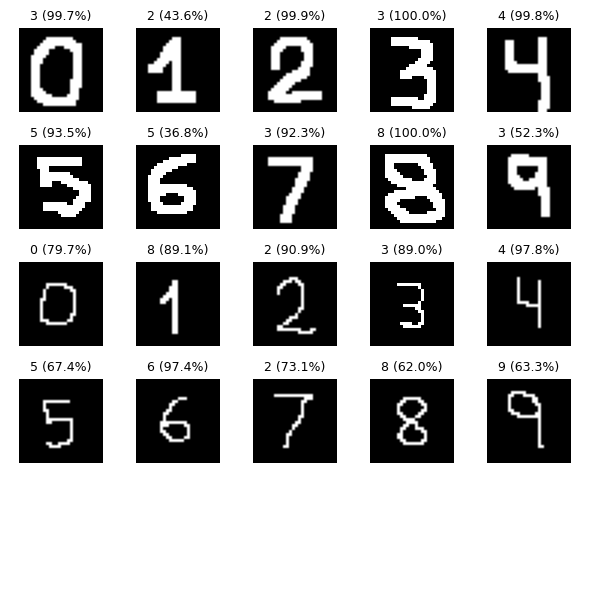

In [5]:
preds = model.predict(X_custom)
pred_labels = np.argmax(preds, axis=1)
confidences = np.max(preds, axis=1)  # precisión (probabilidad más alta)

# --- Mostrar en grilla ---
h, w = 5, 5  # tamaño de la grilla (puede ajustarse)
fig, axs = plt.subplots(h, w, figsize=(1.2*w, 1.2*h))

total = len(original_images)
k = 0  # contador de imagen actual

for i in range(h):
    for j in range(w):
        ax = axs[i, j]

        if k < total:
            ax.imshow(original_images[k], cmap='gray')
            label = pred_labels[k]
            confidence = confidences[k] * 100
            ax.set_title(f"{label} ({confidence:.1f}%)", fontsize=9)
        else:
            ax.axis('off')  # si no hay más imágenes, ocultar

        ax.axis('off')
        k += 1

plt.tight_layout()
plt.show()
